In [1]:
! pip install missingno

  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)


In [270]:
#Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import missingno as msno
import statsmodels.formula.api as smf
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [133]:
#1 Load the Ames housing dataset
ameshousing = pd.read_csv('AmesHousing.csv')
ameshousing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [134]:
#2 Exploratory Data Analysis
ameshousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [135]:
#2 Describe the data
ameshousing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [136]:
#3 Prepare the dataset for modeling by imputing missing values with the variable's mean value or any other value that you prefer.
ameshousing.isnull()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,False,False,True,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False


In [143]:
#total number of missing data in each variable
ameshousing.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [234]:
#sum of the missings data
ameshousing.isnull().sum().sum()

13997

In [145]:
#sum of missings data
ameshousing.columns[ameshousing.isnull().mean()>0.8]

Index(['Alley', 'Pool QC', 'Fence', 'Misc Feature'], dtype='object')

#filling the null value

In [157]:
df = ameshousing.fillna(value=0)
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,0,IR1,Lvl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,0,Reg,Lvl,...,0,0,MnPrv,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,0,IR1,Lvl,...,0,0,0,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,0,Reg,Lvl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,0,IR1,Lvl,...,0,0,MnPrv,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,0,IR1,Lvl,...,0,0,GdPrv,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,0.0,8885,Pave,0,IR1,Low,...,0,0,MnPrv,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,0,Reg,Lvl,...,0,0,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,0,Reg,Lvl,...,0,0,0,0,0,4,2006,WD,Normal,170000


#filling null value with the mean value

In [158]:
result = df.fillna(df.mean())
print('Result:')
print(result)

Result:
      Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           0.0      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Conto

In [162]:
#Remove  Alley, PoolQC, Fence and MiscFeatures since they have more  missing values
df1 = result.drop(columns=['Alley', 'Pool QC', 'Fence', 'Misc Feature'])
df1 

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,0.0,8885,Pave,IR1,Low,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [163]:
#view if there is any null data
df1.isnull().sum().view()

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 78, dtype: int64

In [170]:
#Replacing column name
df1.columns = [colname.replace(" ", "") for colname in df1.columns]
df1.head()

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


Correlation Matrix

In [171]:
#4 correlation matrix of the numeric values with cor()
df1.corr()

,Order,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Order,1.000000,0.173593,0.011797,0.008748,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.031045,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.038104,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.225672,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MSSubClass,0.011797,-0.001281,1.000000,-0.233959,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.003634,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
LotFrontage,0.008748,-0.038104,-0.233959,1.000000,0.136862,0.128840,-0.034675,0.026130,0.069509,0.109858,...,0.001162,0.085480,0.024824,0.004061,0.045789,0.109439,0.003098,0.017357,-0.011737,0.201875
LotArea,0.031354,0.034868,-0.204613,0.136862,1.000000,0.097188,-0.034759,0.023258,0.021682,0.125950,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
OverallQual,-0.048500,-0.263147,0.039419,0.128840,0.097188,1.000000,-0.094812,0.597027,0.569609,0.423089,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
OverallCond,-0.011054,0.104451,-0.067349,-0.034675,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.132472,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
YearBuilt,-0.052319,-0.343388,0.036579,0.026130,0.023258,0.597027,-0.368773,1.000000,0.612095,0.306797,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
YearRemod/Add,-0.075566,-0.157111,0.043397,0.069509,0.021682,0.569609,0.047680,0.612095,1.000000,0.191740,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
MasVnrArea,-0.031045,-0.225672,0.003634,0.109858,0.125950,0.423089,-0.132472,0.306797,0.191740,1.000000,...,0.165875,0.140003,-0.109915,0.014222,0.066817,0.004893,0.045276,-0.002358,-0.016876,0.502196


[Text(0.5, 1.0, 'correlation matrix with corrplot')]

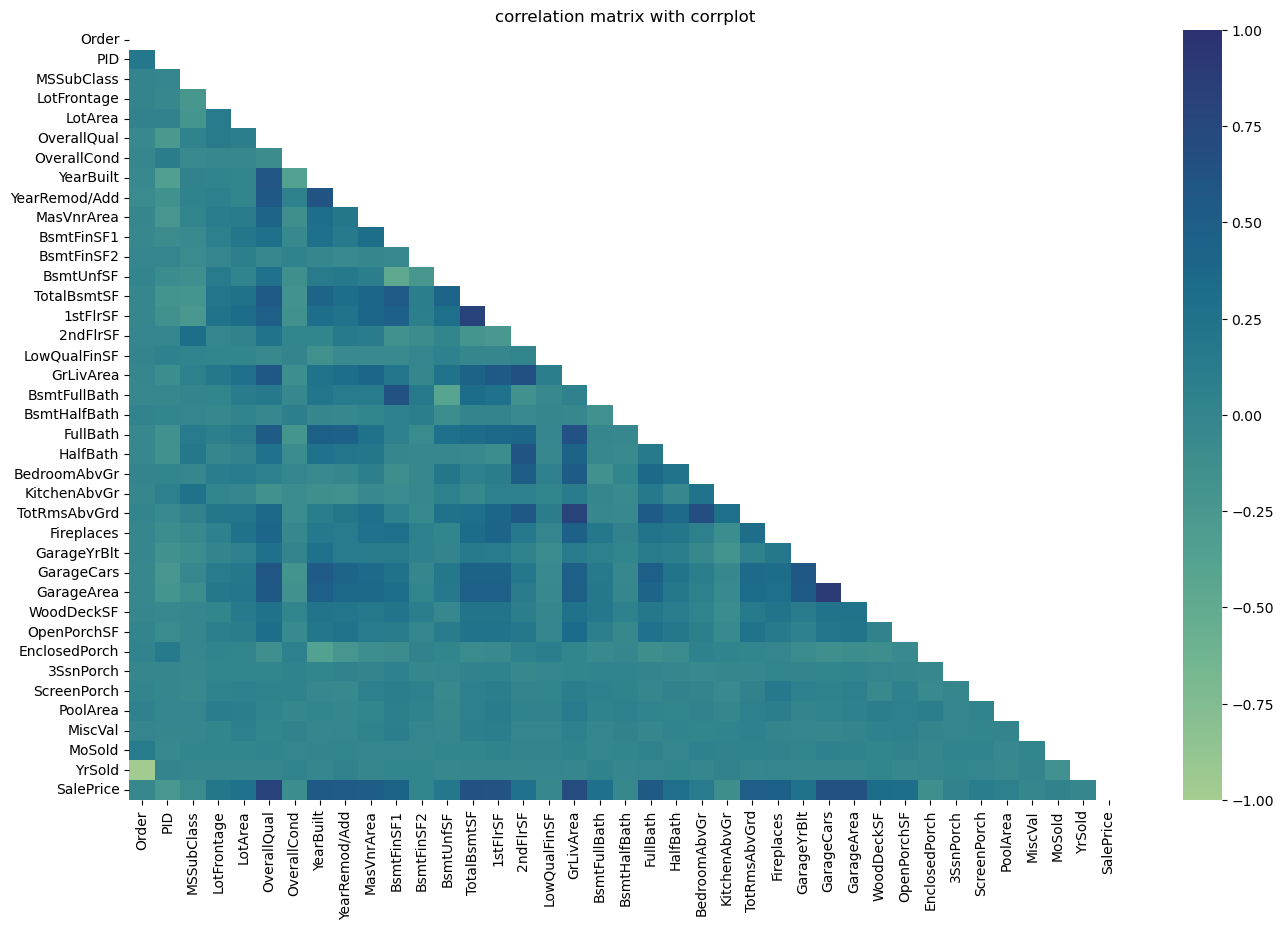

In [179]:
#5 a plot of the correlation matrix check the corrpl
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(df1_corr, dtype=np.bool))
sns.heatmap(df1_corr, mask=mask, vmin=-1, vmax=1, cmap='crest').set(title="correlation matrix with corrplot")

Scatter plot

In [175]:
#6correlation matrix of some numeric values that has a moderate and high correlation with sale price with cor()
df1_corr = df1.corr()
df1_corr[(df1_corr.SalePrice > 0.5)  | (df1_corr.SalePrice < -0.5)]
df1_corr.SalePrice.abs().sort_values().tail()

GarageArea     0.640138
GarageCars     0.647562
GrLivArea      0.706780
OverallQual    0.799262
SalePrice      1.000000
Name: SalePrice, dtype: float64

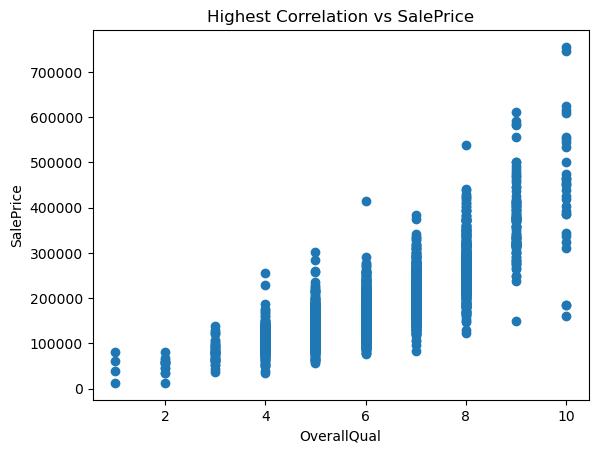

In [182]:
# scatter plot for the X continuous variable with the highest correlation with SalePrice
plt.scatter(x = 'OverallQual', y = 'SalePrice', data=df1)
plt.xlabel("OverallQual", size = 10)
plt.ylabel("SalePrice", size = 10)
plt.title("Highest Correlation vs SalePrice")
plt.show()

In [190]:
#correlation matrix of some numeric values that has a lowest correlation with sale price with cor()
df1_corr1 = ameshousing.corr()
df1_corr1[(df1_corr1.SalePrice < 0)  | (df1_corr.SalePrice < -1)]
df1_corr1.SalePrice.abs().sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.799262
GrLivArea        0.706780
GarageCars       0.647877
GarageArea       0.640401
TotalBsmtSF      0.632280
1stFlrSF         0.621676
YearBuilt        0.558426
FullBath         0.545604
YearRemod/Add    0.532974
GarageYrBlt      0.526965
MasVnrArea       0.508285
TotRmsAbvGrd     0.495474
Fireplaces       0.474558
BsmtFinSF1       0.432914
LotFrontage      0.357318
WoodDeckSF       0.327143
OpenPorchSF      0.312951
HalfBath         0.285056
BsmtFullBath     0.276050
2ndFlrSF         0.269373
LotArea          0.266549
PID              0.246521
BsmtUnfSF        0.182855
BedroomAbvGr     0.143913
EnclosedPorch    0.128787
KitchenAbvGr     0.119814
ScreenPorch      0.112151
OverallCond      0.101697
MSSubClass       0.085092
PoolArea         0.068403
LowQualFinSF     0.037660
BsmtHalfBath     0.035835
MoSold           0.035259
3SsnPorch        0.032225
Order            0.031408
YrSold           0.030569
MiscVal          0.015691
BsmtFinSF2  

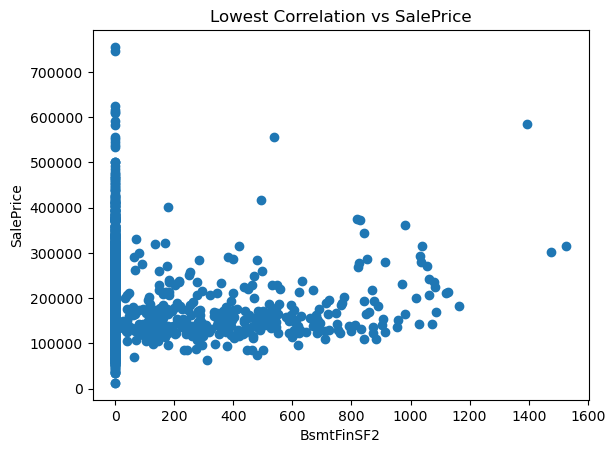

In [193]:
# scatter plot for the X continuous variable with the lowest correlation with SalePrice
plt.scatter(x = 'BsmtFinSF2', y = 'SalePrice', data=df1)
plt.xlabel("BsmtFinSF2", size = 10)
plt.ylabel("SalePrice", size = 10)
plt.title("Lowest Correlation vs SalePrice")
plt.show()

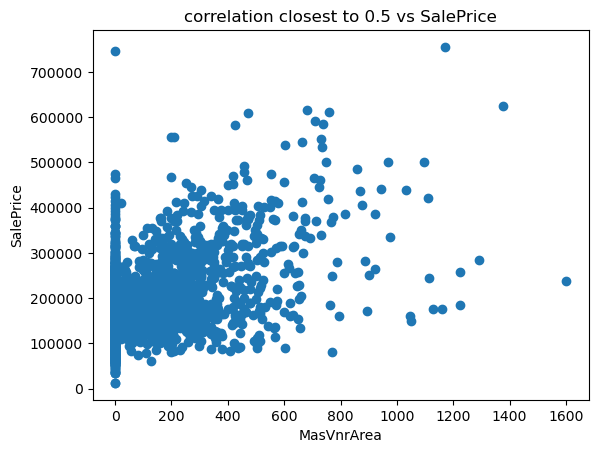

In [194]:
# scatter plot between X and SalePrice with the correlation closest to 0.5.
plt.scatter(x = 'MasVnrArea', y = 'SalePrice', data=df1)
plt.xlabel("MasVnrArea", size = 10)
plt.ylabel("SalePrice", size = 10)
plt.title("correlation closest to 0.5 vs SalePrice")
plt.show()

In [235]:
#7 Using at least 3 continuous variables fit a regression model
ah =  smf.ols(' SalePrice ~ GrLivArea + GarageCars + OverallQual', data = df1)
model1 = ah.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     2981.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:28:25   Log-Likelihood:                -35181.
No. Observations:                2930   AIC:                         7.037e+04
Df Residuals:                    2926   BIC:                         7.039e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.043e+05   3301.178    -31.583      0.000   -1.11e+05   -9.78e+04
GrLivArea      52.3517      1.811     28.900      0.000      48.800      55.904
GarageCars   1.968e+04   1234.527     15.938      0.000    1.73e+04    2.21e+04
OverallQual  2.819e+04    707.835     39.821      0.000    2.68e+04    2.96e+04
==============================================================================
Omnibus:                      729.036   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14220.661
Skew:                           0.679   Prob(JB):                         0.00
Kurtosis:                      13.707   Cond. No.                     7.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [236]:
df1.columns

Index(['Order', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDri

In [ ]:
#8 Report the model in equation form and interpret each coefficient of the model in the context of this problem
 -1043 + GrLivArea*52.30517 + GarageCars*1970 + OverallQual*2819

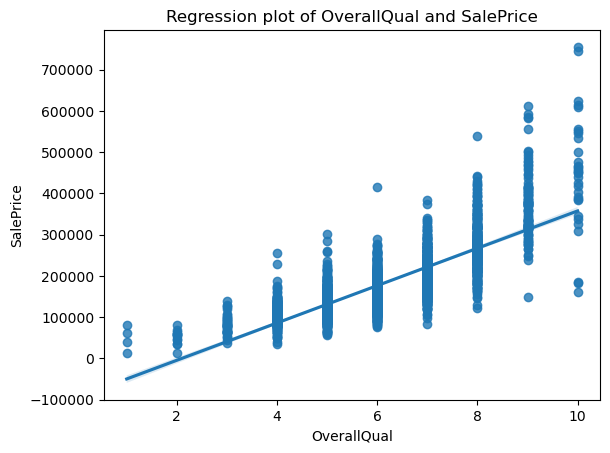

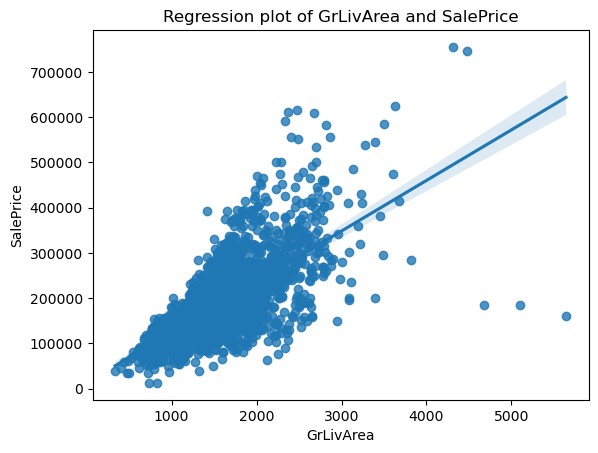

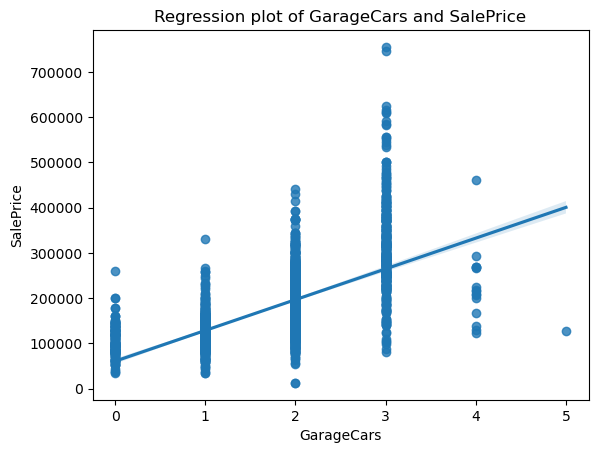

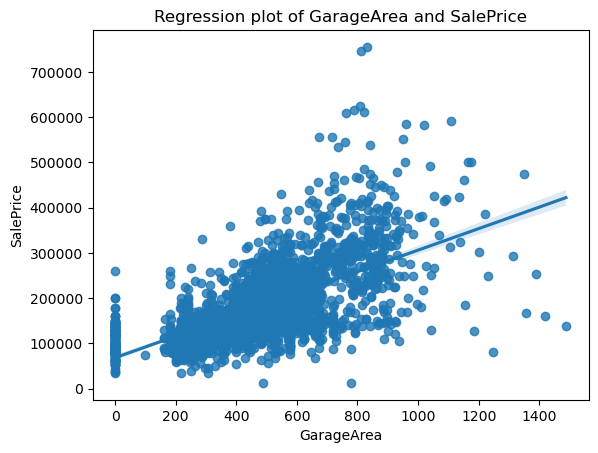

In [280]:
#9 Use the "plot()" function to plot your regression model. Interpret the four graphs that are produced.
import seaborn as sns # Convention alias for Seaborn

variables = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
# Regression Plot also 
    model2 = sns.regplot(x=var, y='SalePrice', data=df1).set(title=f'Regression plot of {var} and SalePrice');

0       190904.851623
1       103254.688222
2       154109.585140
3       242859.134273
4       161304.745518
            ...      
2925    156719.190536
2926    123245.058519
2927     87452.454045
2928    148740.337156
2929    256776.707195
Length: 2930, dtype: float64

[Text(0.5, 1.0, 'Regression Model of GarageArea and SalePrice')]

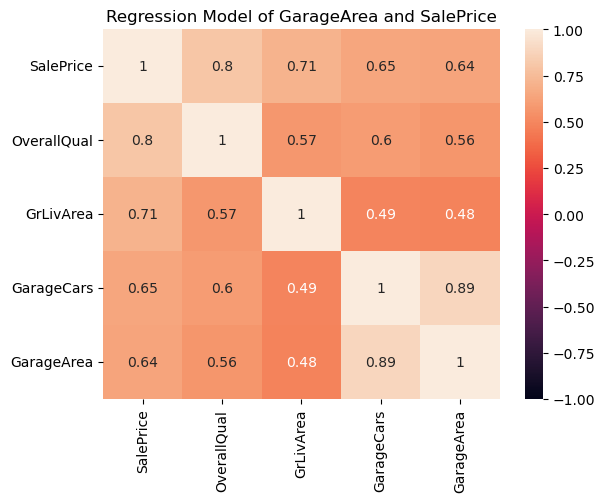

In [292]:
#10 Check your model for multicollinearity and report your findings.
model3 = df1[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']]
sns.heatmap(model3.corr(), annot=True, vmin=-1, data=model3).set(title=f'Regression Model of {var} and SalePrice')

After removing outlier from GarageCars

<AxesSubplot:xlabel='SalePrice'>

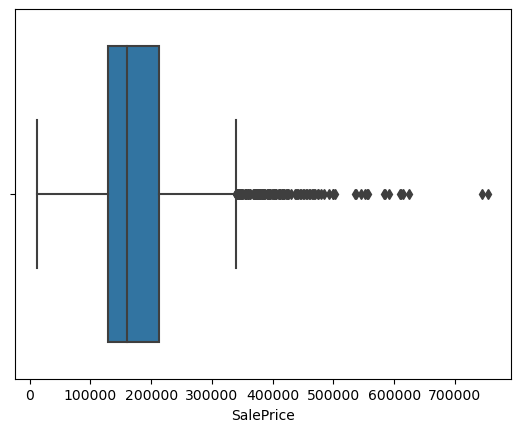

In [214]:
#11 Check your model for outliers and report your findings.
sns.boxplot(df1.SalePrice)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

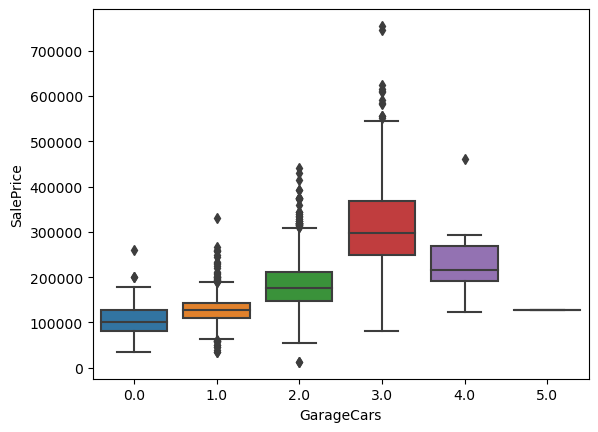

In [233]:
#11 Check your model for outliers and report your findings.
model_gar = sns.boxplot(x='GarageCars', y='SalePrice', data=df1)
model_gar

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

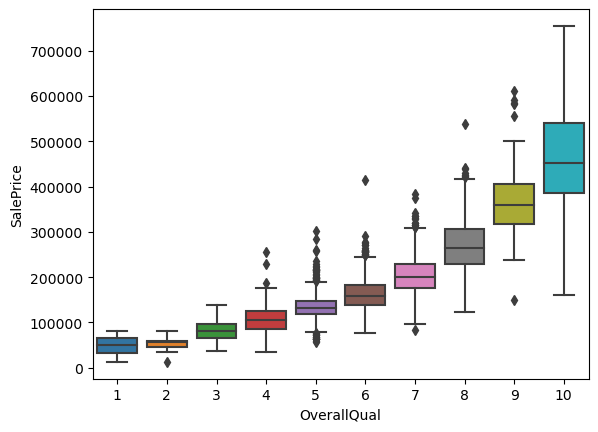

In [231]:
# Check your model for outliers and report your findings.
model_new = sns.boxplot(x='OverallQual', y='SalePrice', data=df1)
model_new

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

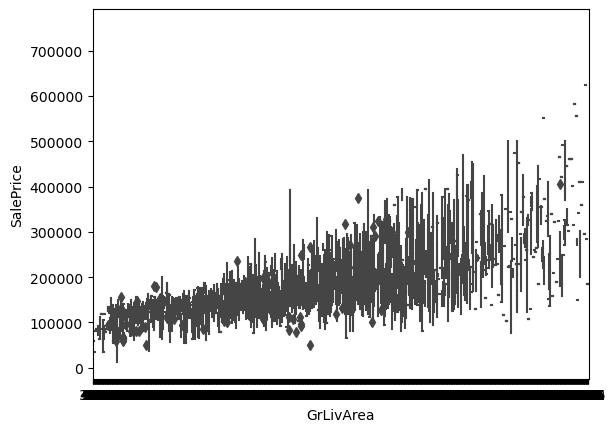

In [298]:
# Check your model for outliers and report your findings.
model_new1 = sns.boxplot(x='GrLivArea', y='SalePrice', data=df1)
model_new1

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

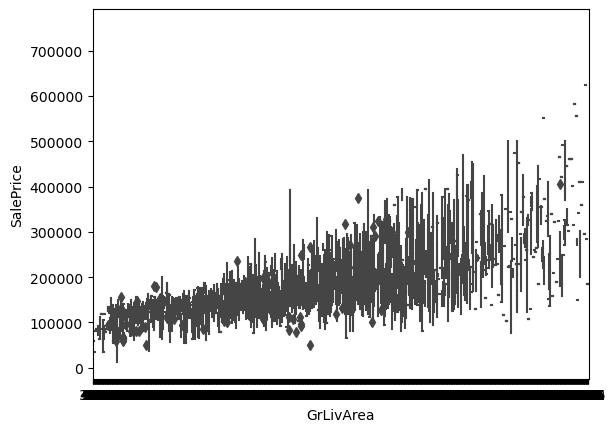

In [300]:
# Check your model for outliers and report your findings.
model_new2 = sns.boxplot(x='GrLivArea', y='SalePrice', data=df1)
model_new2